#  🏁 1. Introduction to TabBench

## 1.1 What is TabBench?

**TabBench** is a new benchmark built to evaluate machine learning models on **tabular data**, focusing on **real-world industry use cases**.

TabBench addresses a critical gap: traditional benchmarks tend to rely on public, academic datasets that are clean and carefully curated. While useful for research, they fail to reflect the imperfect nature of private enterprise data. 

To bridge this gap, TabBench introduces a new evaluation framework focused on real industry use cases. It enables a meaningful comparison of models specifically designed to address concrete business problems across sectors, starting with the domain of **Commerce**.

Commerce organizations rely heavily on tabular data that is complex, messy and highly-dimensional: structured datasets like product catalogs, transaction histories, and customer records power core business operations and decisions. 

TabBench is specifically designed to assess ML models on high-impact, real-world tasks such as product categorization and deduplication, going beyond traditional classification or regression problems. 

Its goal is to equip data science teams with the tools they need to identify and develop the most effective and powerful ML models tailored to their unique use cases.

## 1.2 What does it include? 
With **TabBench**, you get:

- **Industry-focused use cases with standardized workflow logic:**  
  Target critical production problems through streamlined workflows featuring consistent preprocessing, training, and evaluation steps applied uniformly across all models.
- **Evaluation on Industrial & Academic datasets:**  
  - Assess models on proprietary industry datasets from partner companies. [Contact Us](https://www.neuralk-ai.com/contact)  
  - Complementary evaluation on selected academic datasets for comprehensive comparison.
- **Performance tracking:**  
  Easily identify top-performing tabular models via the TabBench [Dashboard](https://www.dashboard.neuralk-ai.com)
- **Neuralk Foundry-CE:**  
  TabBench is built on top of Neuralk Foundry-CE, a modular framework designed to help you quickly build and experiment with your own workflows. [Explore here](https://github.com/Neuralk-AI/NeuralkFoundry-CE/)



# 🛍️ 2. Getting started: Product Categorization 

This tutorial walks you through a basic product categorization task using a public e-commerce dataset. The goal is to predict the product category based on features like product name, price, and manufacturer.


## 2.1 What is a Workflow?

To streamline each task, we developed a library of predefined **Workflows** — a sequence of modular **steps**, each responsible for a specific part of the pipeline, from preprocessing to prediction. 

A **workflow** is a reusable chain of operations tailored to a given use case, such as classification, deduplication, or regression. It encapsulates best practices for data loading, splitting, model training, and evaluation, tailored to each use case. This modular design makes it easy to experiment with different methods at every stage and directly compare their impact on model performance.

In this example, we focus on product categorization — a classification problem — using one of these pre-defined workflows to demonstrate how TabBench can be effectively applied in practice.


### 2.1.1 The Product Categorization Workflow

We treat Product Categorization a standard **multiclass classification** problem: predicting the category of a product based on its **name**, **price**, and **manufacturer**. The dataset is derived from public **BestBuy** product listings and includes a variety of consumer goods.

The objective is to classify each product into one of three broad categories:

* **HardGoods**: Physical consumer electronics or accessories (e.g., CD-R packs, coffee machines).
* **Games**: Video games and related media.
* **Software**: Educational or productivity software.

Below is a sample of the input data:

| Product ID | Name                                              | Price  | Manufacturer  | Category |
| ---------- | ------------------------------------------------- | ------ | ------------- | -------- |
| 44120      | Memorex - Cool Colors 50-Pack 52x CD-R Disc Sp... | 19.99  | Memorex       | HardGood |
| 33157      | Mr. Coffee - 12-Cup Coffeemaker - Metallic Red    | 49.99  | Mr. Coffee    | HardGood |
| 48322      | The Crew - Xbox One                               | 29.99  | Ubisoft       | Game     |
| 45372      | RCA - Discwasher Vinyl Record Care System         | 19.99  | RCA           | HardGood |
| 22339      | Overwatch Collector's Edition - Xbox One          | 129.99 | Blizzard      | Game     |
| 5906       | Metra - Speaker Adapter Plates for Select Mazd... | 16.99  | Metra         | HardGood |
| 10168      | Rosetta Stone Version 4 TOTALe: Italian Level ... | 299.99 | Rosetta Stone | Software |

We begin by initializing the default workflow provided by TabBench for classification tasks. This allows us to explore the sequence of predefined steps, such as preprocessing, model training, and evaluation, that have been designed to handle typical tabular classification problems like this one.

### 2.1.2 Visualizing Workflows

To better understand how a workflow is structured, TabBench provides a built-in visualization tool that can be used directly within a notebook environment. With a single command, you can generate a clear, user-friendly diagram showing each step, its inputs, and its outputs—making the overall process easy to follow and debug.

In [1]:
from tabbench.workflow.use_cases import Categorisation

use_case = Categorisation('best_buy_simple_categ')
use_case.notebook_display()

/Users/makaroff/Documents/GitHub/TabBench/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


This demonstrates how TabBench seamlessly handles input data within a modular, step-by-step design:

- **`LoadDataset`**  
  Loads the dataset to be used for evaluation.

- **`StratifiedShuffleSplitter`**  
  Splits the data into training and test sets while preserving class distribution.

- **`PreprocessingStep`**
  - Applies standard scaling to continuous features
  - Applies one-hot encoding to categorical features

- **`TfIdfVectorizer`**  
  Transforms text features using TF-IDF vectorization.

- **`LabelEncoding`**  
  Encodes the target variable to ensure compatibility with most model formats.

- **`XGBoostClassifier`**  
  A gradient boosting model that could be used for training and prediction.


This example provides a complete overview of how TabBench can be used to process structured and textual features together in a unified workflow.



### 2.1.3 A Workflow Step

In TabBench, workflows are built as a sequence of modular, interchangeable components, that we call **Steps**. 

To ensure they can be flexibly chained together, each step adheres to a common interface: it defines the inputs it expects and the outputs it produces. This structure allows the output of one step to seamlessly feed into the next.

For example, a classifier step typically receives `X`, `y`, and `splits` as inputs—representing the features, targets, and the train/validation/test partition. It then returns predictions such as `y_pred` (predicted labels) and `y_score` (confidence scores or probabilities). This standardized input/output behavior is what enables different steps to be combined, replaced, or reused consistently across workflows. 

Steps are composable and interchangeable, making it easy to compare different implementations—for instance, swapping a TF-IDF vectorizer for a sentence transformer. 

Each use case is defined by its own step sequence, and benchmarking different variants simply means swapping steps within a consistent workflow.


**Inspecting a Workflow Step**

In addition to the visual overview, you can inspect individual steps in more detail using their `describe()` method. This reveals the specific inputs each step expects and the outputs it produces, helping you understand how data flows through the pipeline and how each component contributes to the overall task.


In [2]:
from neuralk_foundry_ce.models.classifier import XGBoostClassifier

clf = XGBoostClassifier()
print(clf.describe())

Train an XGBoost classifier on tabular data.

Inputs:
- X: Input features of the dataset
- y: Target variable to predict
- splits: Masks for train, validation, and test sets
- metric_to_optimize: Metric to optimize during model selection or hyperparameter tuning
- y_classes: Original classes before label encoding (optional)
- categorical_features: Names of columns corresponding to categorical features

Outputs:
- y_pred: Predicted target values
- y_score: Class probability distribution for each sample

Parameters:
  None


## Running the Workflow



In [ ]:
data, metrics = use_case.run() # Beware that we are running 100 trials. Go grab a coffee. 
print(f'Final test ROC AUC {metrics["xgboost-classifier"]["test_roc_auc"]}')

Predictions are now readily available to explain results for example through a confusion matrix.

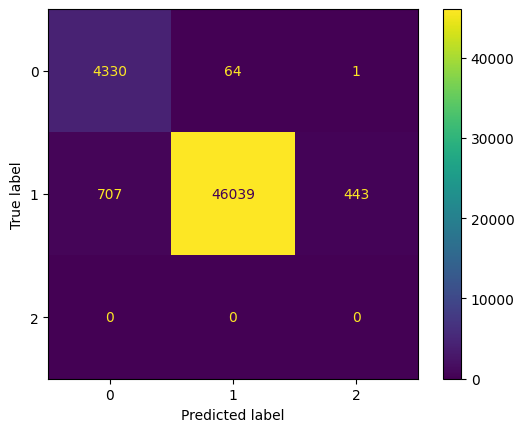

In [4]:
from sklearn.metrics import ConfusionMatrixDisplay


ConfusionMatrixDisplay.from_predictions(data['y_pred'], data['y'])

## Conclusion

This introductory example highlights how **TabBench** is purpose-built to address real-world use cases by enabling you to construct and execute end-to-end machine learning workflows tailored to specific industry problems. 

From loading datasets and task-specific splitting to feature vectorization, model training, and evaluation, every step is designed with the use case in mind.

Beyond this simple task, TabBench offers other tutorials that explore more complex customization and workflow capabilities. 

Check the other tutorials:

* [2 - Adding a local or internet dataset](./2%20-%20Adding%20a%20local%20or%20internet%20dataset.ipynb)

* [3 - Use a custom model.ipynb](./3%20-%20Use%20a%20custom%20model.ipynb)

